In [3]:
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [4]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = './Data/'
args.train_csv = args.default_path+'aug_train.csv'
args.test_csv = args.default_path+'aug_test.csv'

# Load Data

> - enrollee_id : 후보자 식별 코드  
> - city : 도시 코드  
> - city_devel_development_index : 도시 개발 지수  
> - gender : 성별    
> - relevent_experience : 관련 분야 경험 유무  
> - enrolled_univercity : 대학 과정 등록 여부 및 유형  
> - education_level : 학력 수준   
> - major_discipline : 전공 분야  
> - experience : 전체 경력 년수  
> - company_size : 현재 재직중인 회사의 직원 수 규모  
> - company_type : 현재 회사의 형태  
> - last_new_job : 이전 직장과 현재 직장의 이직 간 년차  
> - training_hours : 교육 시간 총합  
> - target : 이직 의향 여부  

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [8]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape

((19158, 14), (2129, 13))

In [9]:
ori_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [10]:
ori_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
ori_train.drop('enrollee_id', axis=1, inplace=True)
ori_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# EDA
> target 변수 분포  
> 수치형 변수  
> 범주형 변수  
> target별 그룹 비교  
> 상관관계 확인  

In [12]:
ori_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [13]:
ori_train.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [14]:
ori_train.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [15]:
missing = ((ori_train.isnull().sum())/len(ori_train))*100
missing

city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [16]:
# 타겟 변수 분포
ori_train['target'].value_counts(normalize=True)

target
0.0    0.750652
1.0    0.249348
Name: proportion, dtype: float64

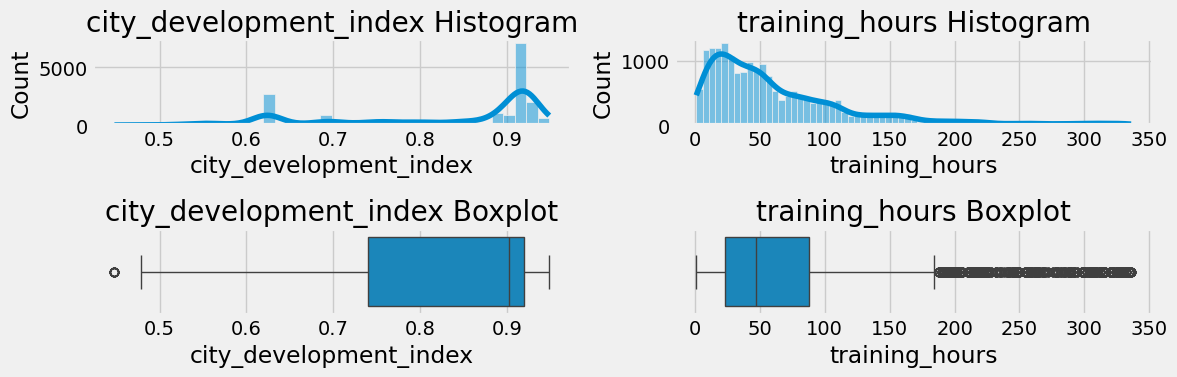

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수 분포
num_cols = ori_train.select_dtypes(include=['int64', 'float64']).columns.drop("target").tolist()
for col in num_cols:
    fig, axes = plt.subplots(2, 2, figsize=(12,4))

    # 히스토그램
    for i, c in enumerate(num_cols[:3]):
      sns.histplot(ori_train[c], kde=True, ax=axes[0, i])
      axes[0, i].set_title(f"{c} Histogram")

    # 박스플롯
    for i, c in enumerate(num_cols[:3]):
        sns.boxplot(x=ori_train[c], ax=axes[1, i])
        axes[1, i].set_title(f"{c} Boxplot")

    plt.tight_layout()
    plt.show()
    break

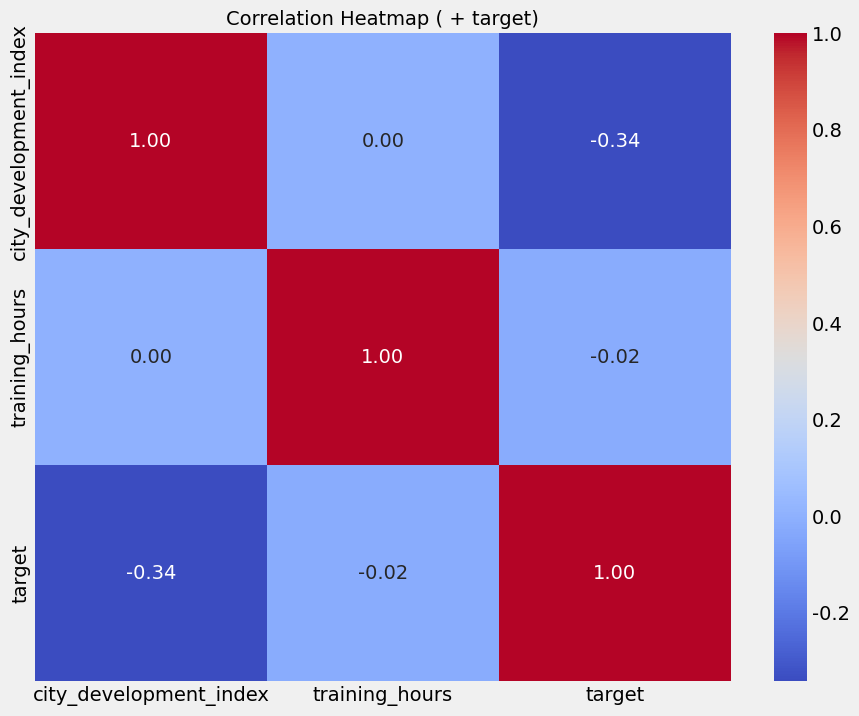

In [18]:
# 수치형변수 상관관계
num_corr = ori_train[num_cols + ["target"]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(num_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap ( + target)", fontsize=14)
plt.show()


🟢 city_development_index
- 도시 발전 지수가 높은 도시 출신 지원자가 많음.
- 하지만 발전 지수가 낮을수록 이직 의향이 높음

🟢 training_hours
- 정규분포가 아니므로 로그변환 해주기
- target과 연관성은 크게 없지만 구간화 함 해보기

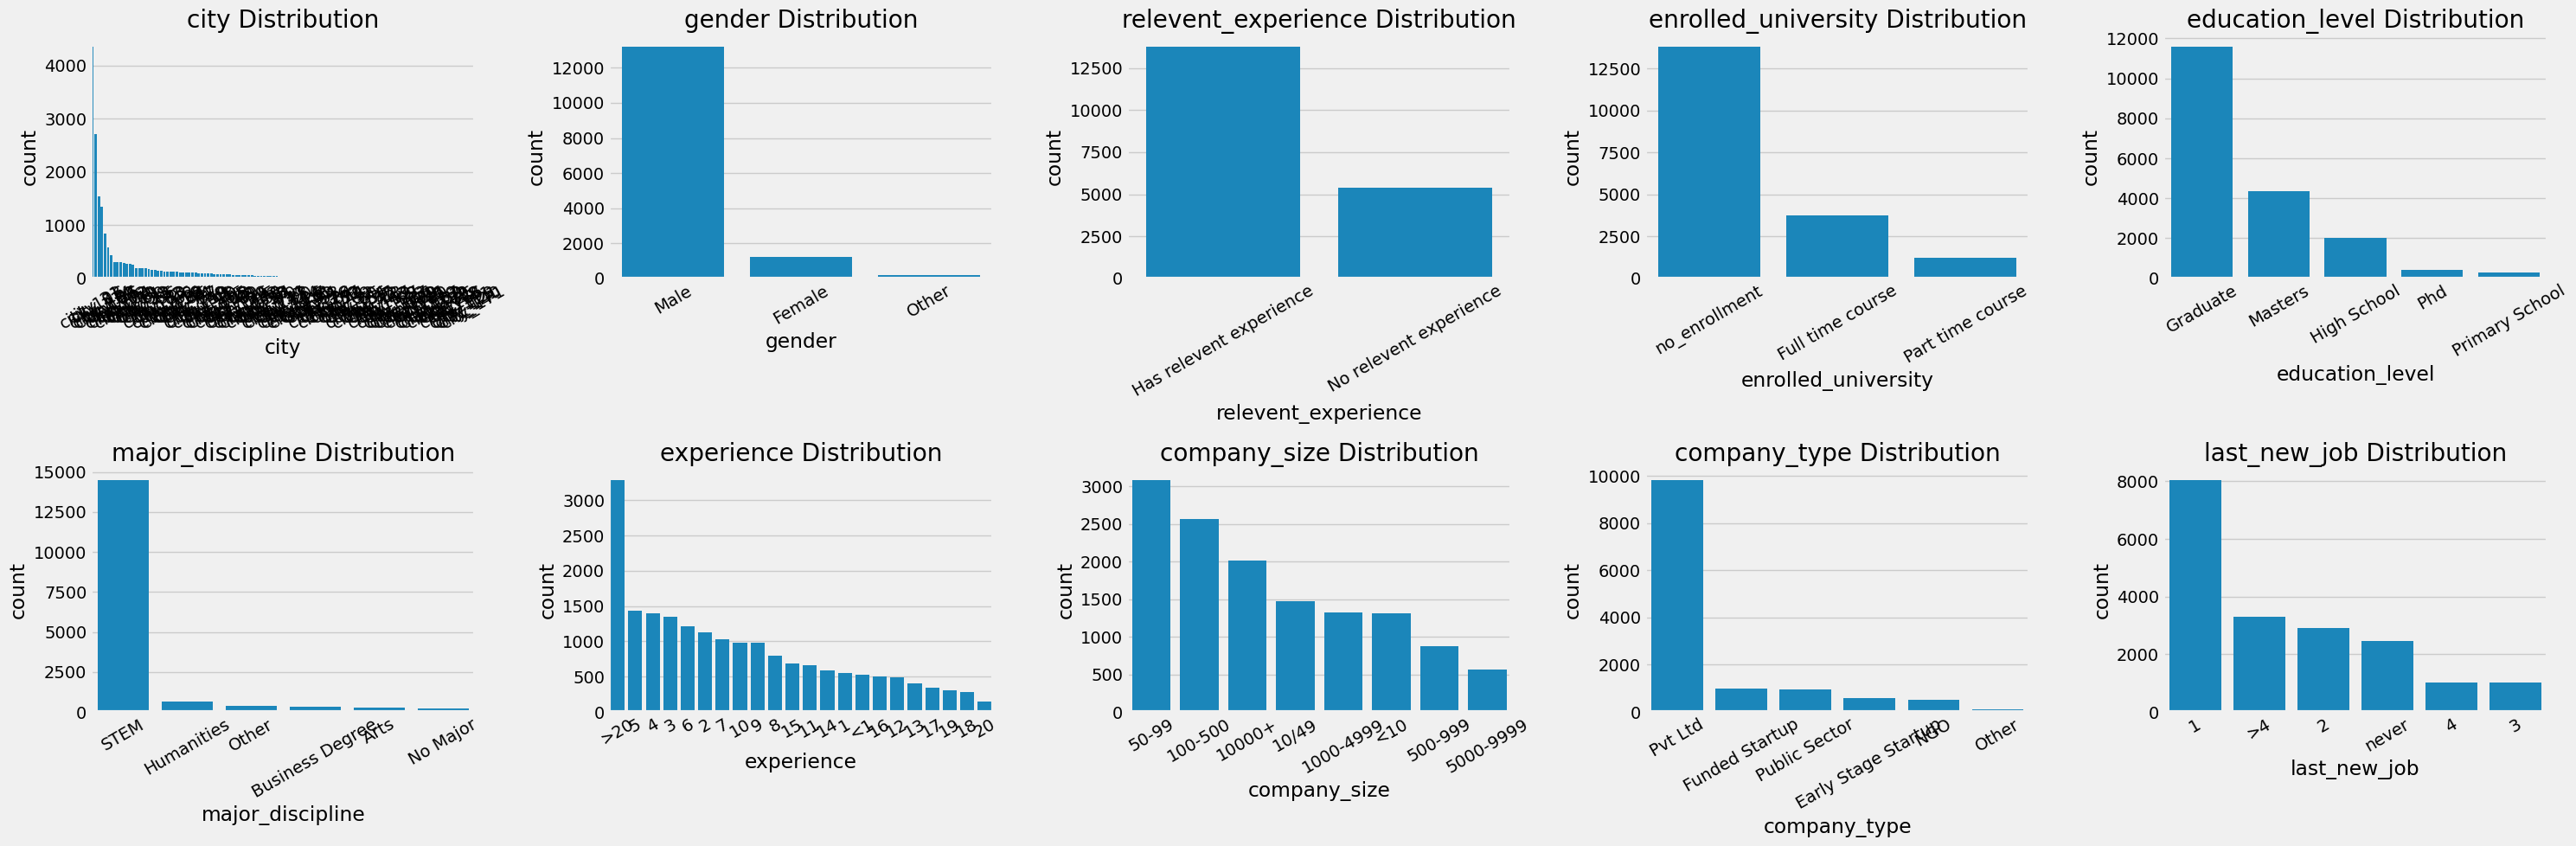

In [19]:
# 범주형 변수 분포
cat_cols = ori_train.select_dtypes(include=['object']).columns.tolist()
for i in range(0, len(cat_cols), 10):   # 10개씩 끊어서
    subset = cat_cols[i:i+10]
    fig, axes = plt.subplots(2, 5, figsize=(30, 10))
    axes = axes.flatten()

    for col, ax in zip(subset, axes):
        sns.countplot(data=ori_train, x=col, order=ori_train[col].value_counts().index, ax=ax)
        ax.set_title(f"{col} Distribution")
        ax.tick_params(axis="x", rotation=30)

    plt.tight_layout()
    plt.show()

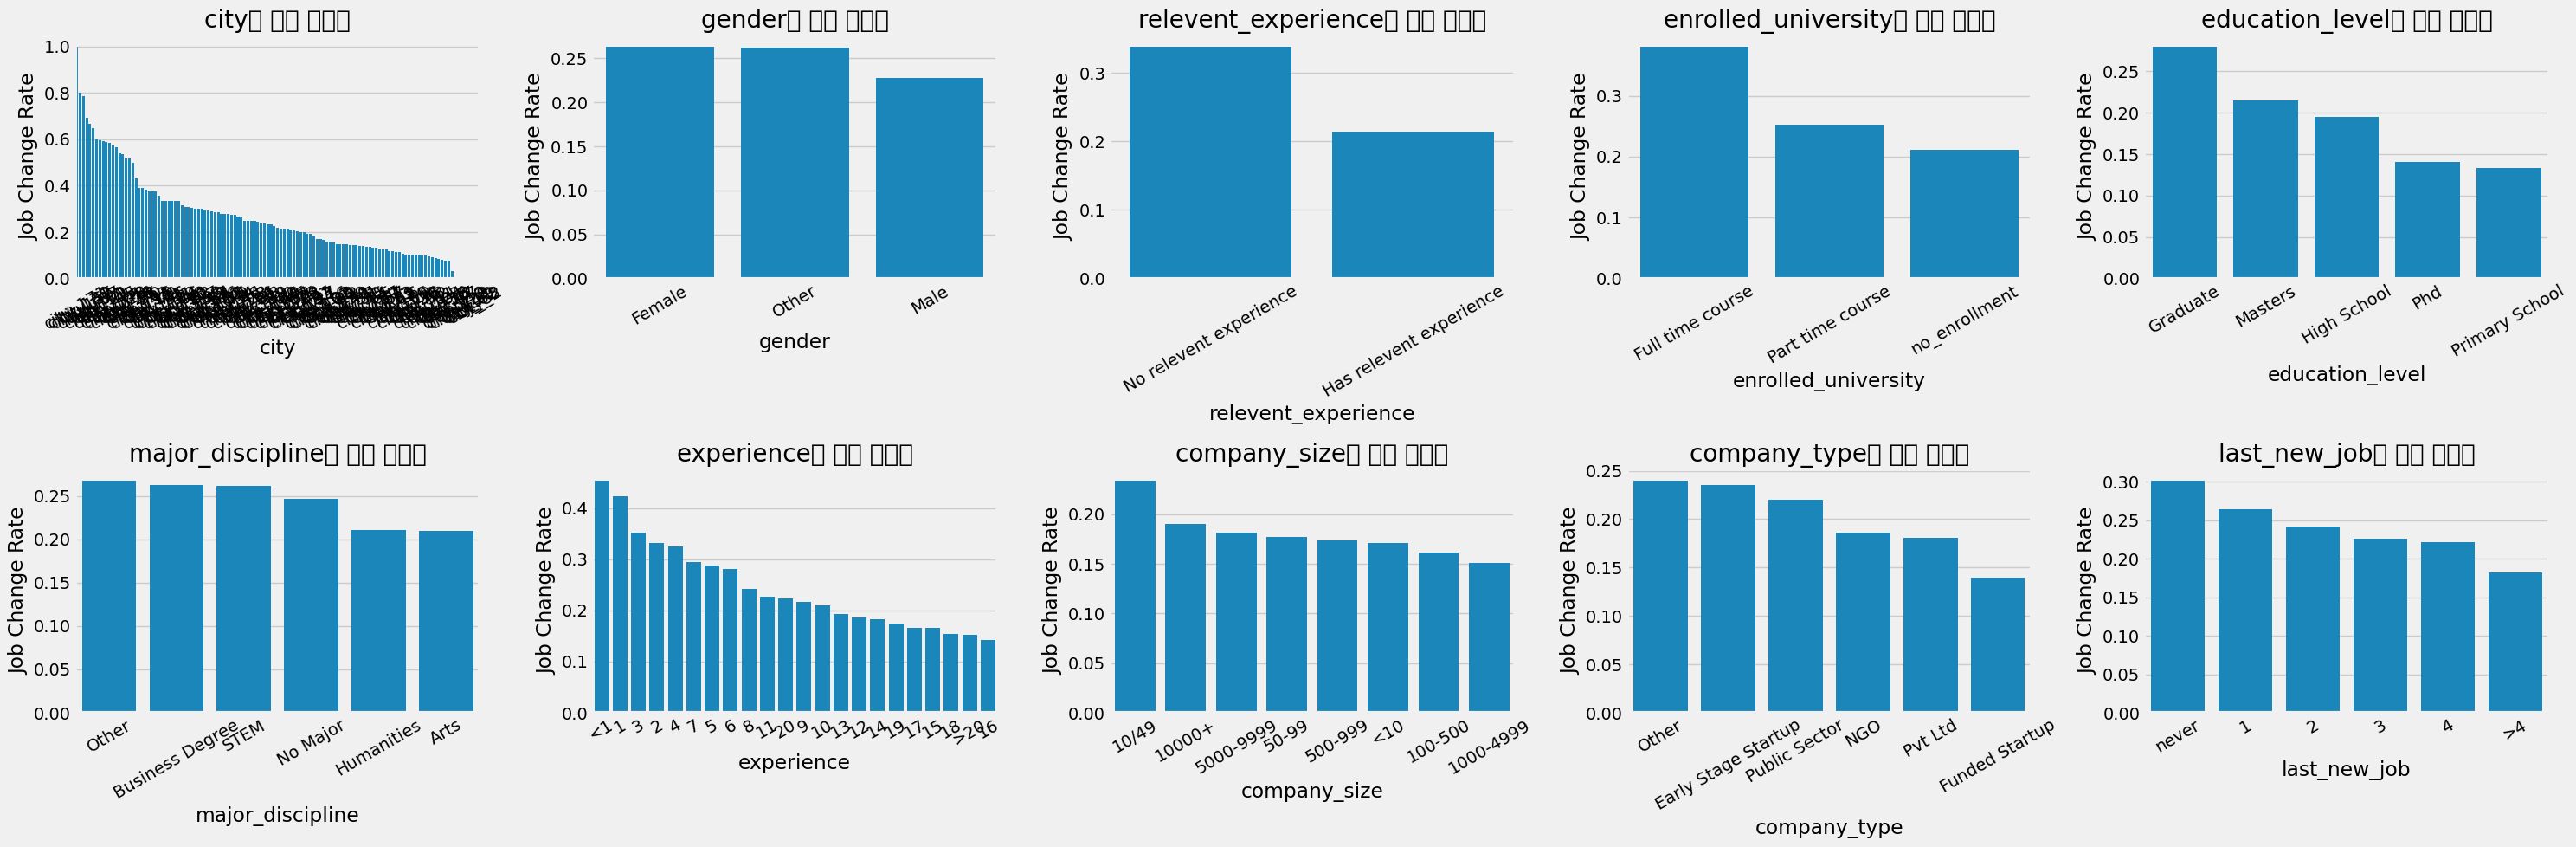

In [20]:
# target과의 관계

for i in range(0, len(cat_cols), 10):
    subset = cat_cols[i:i+10]
    fig, axes = plt.subplots(2, 5, figsize=(30, 10))
    axes = axes.flatten()

    for col, ax in zip(subset, axes):
        rate = ori_train.groupby(col)["target"].mean().sort_values(ascending=False)
        sns.barplot(x=rate.index, y=rate.values, ax=ax)
        ax.set_title(f"{col}별 평균 이직률")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
        ax.set_ylabel("Job Change Rate")


    plt.tight_layout()
    plt.show()

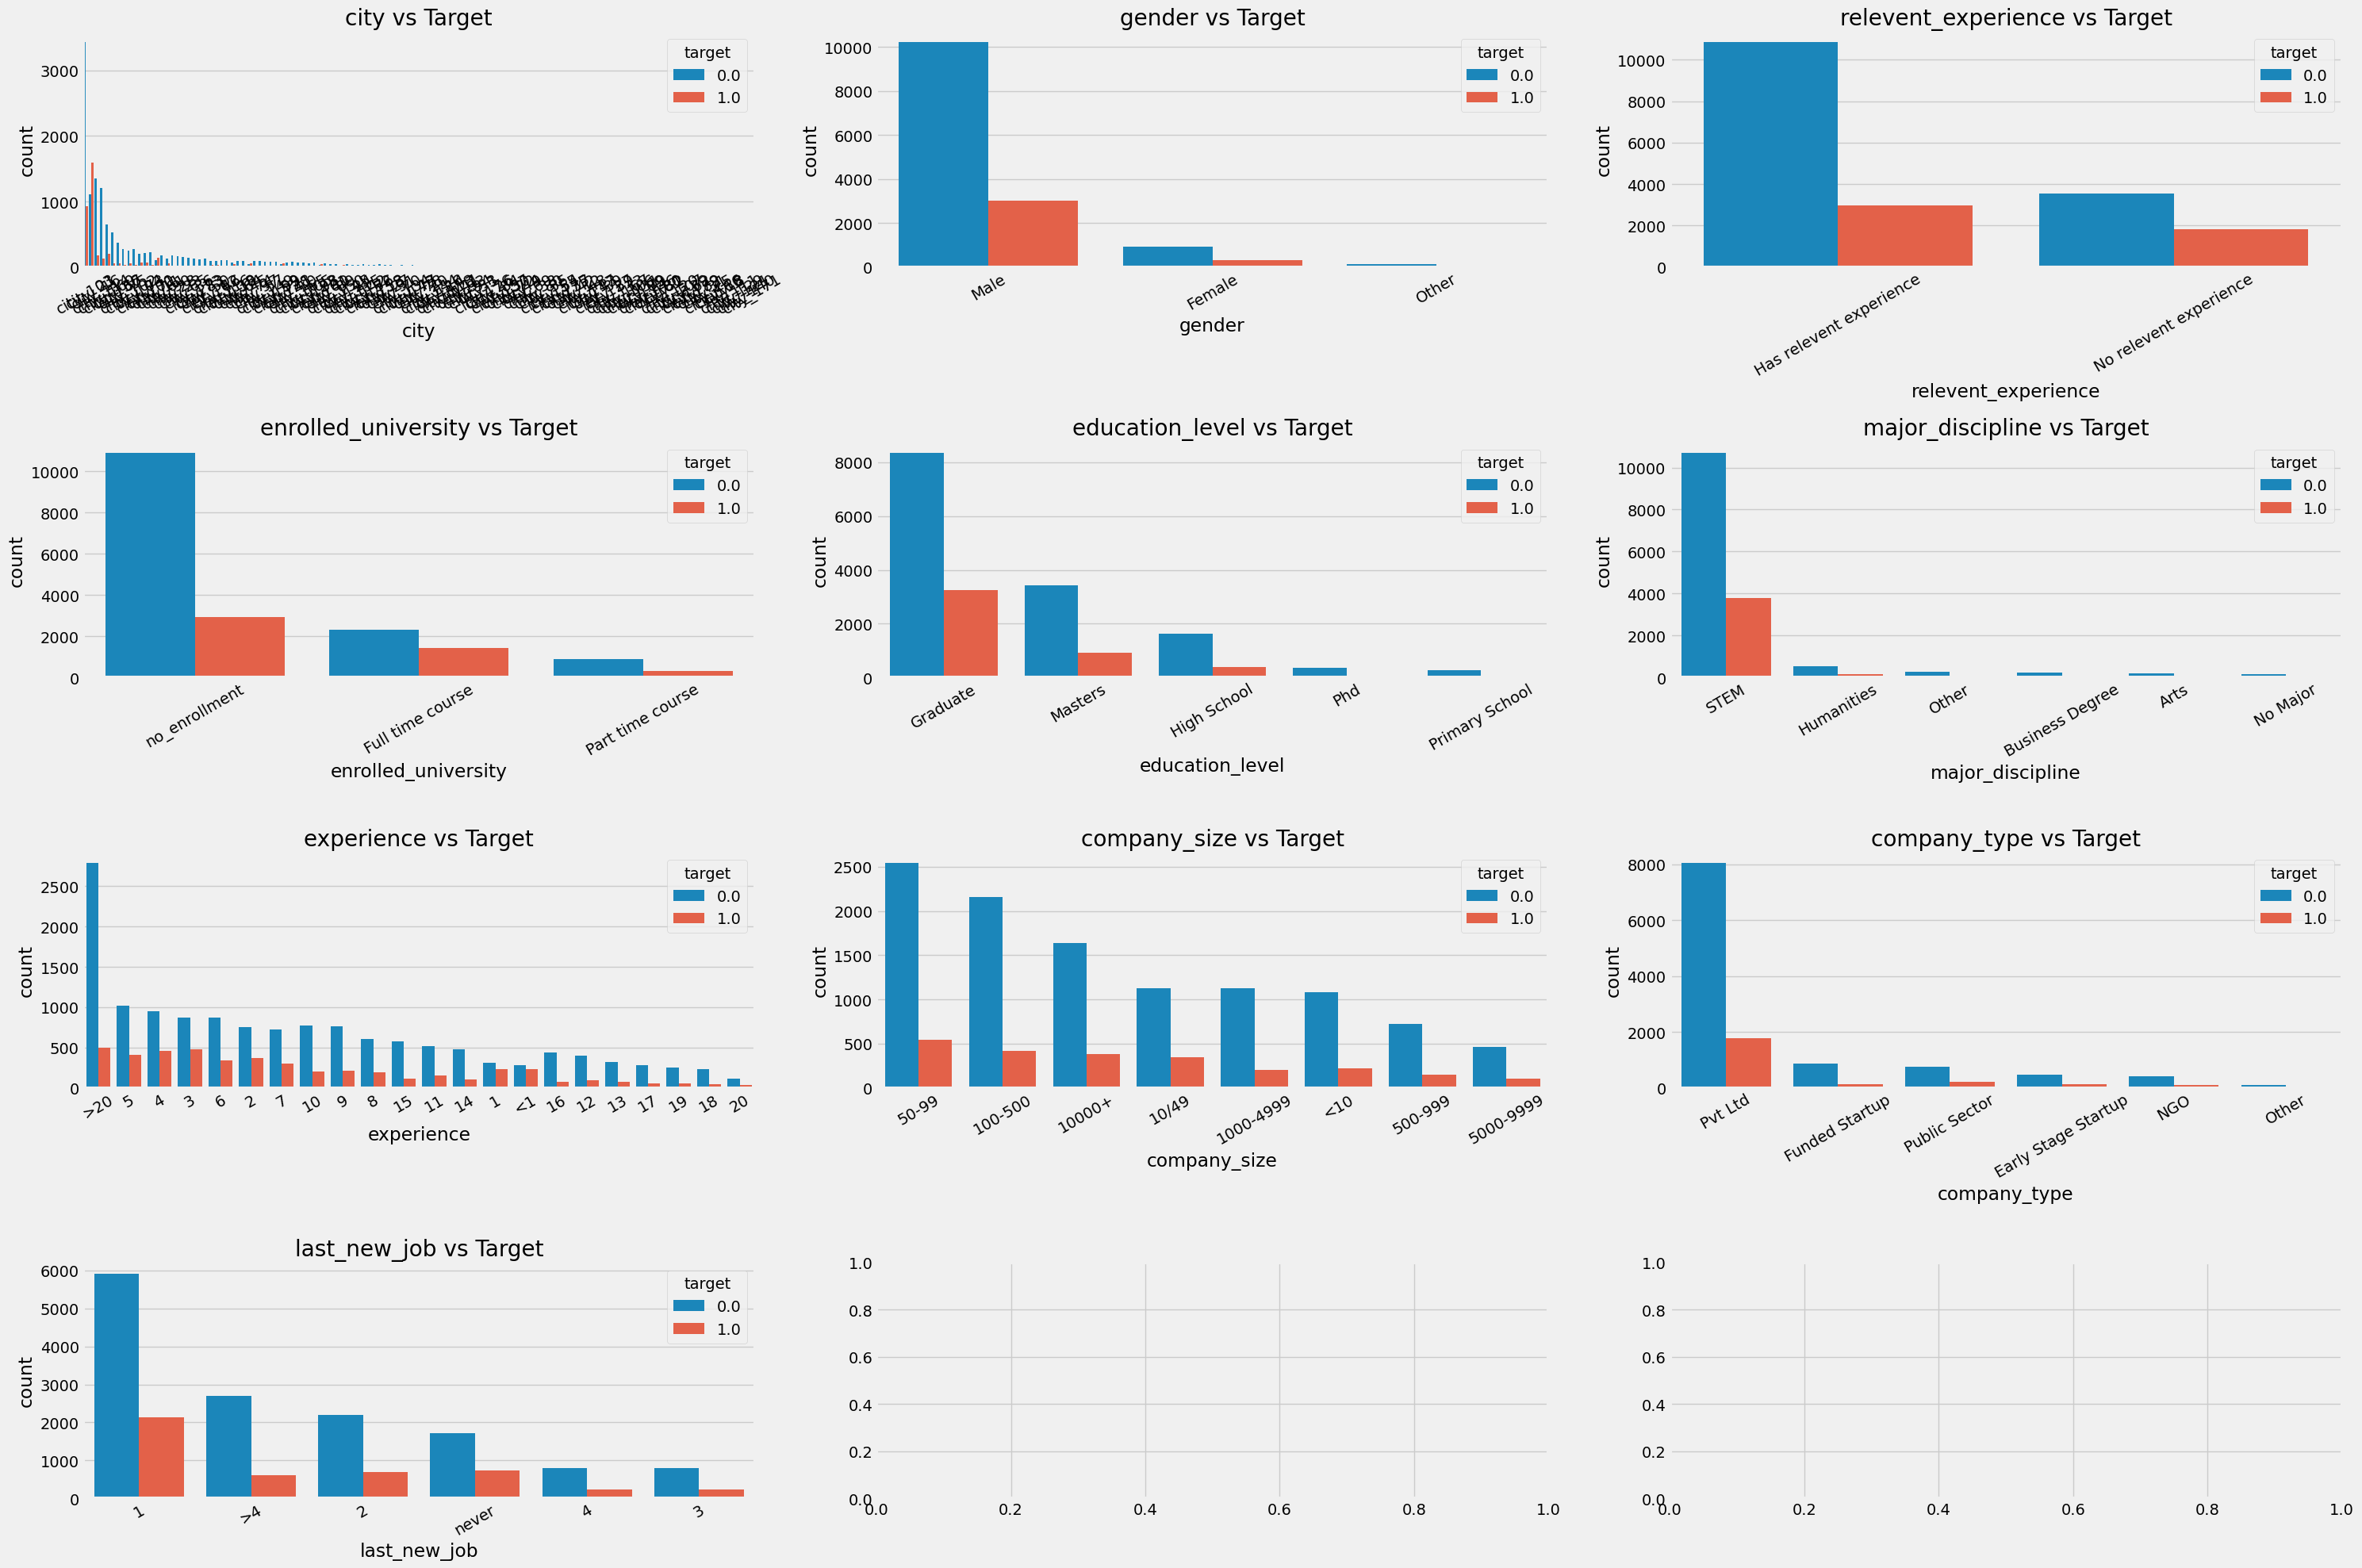

In [21]:
for i in range(0, len(cat_cols), 10):
    subset = cat_cols[i:i+10]
    fig, axes = plt.subplots(4, 3, figsize=(30, 20))
    axes = axes.flatten()

    for col, ax in zip(subset, axes):
        sns.countplot(
            data=ori_train,
            x=col, hue="target",
            order=ori_train[col].value_counts().index,
            ax=ax
        )
        ax.set_title(f"{col} vs Target")
        ax.tick_params(axis="x", rotation=30)

    plt.tight_layout()
    plt.show()

🟢gender
- Male이 대부분이고 Femake/Other는 수가 적음, other는 unknown과 합쳐보기?

🟢 relevent_experience
- No relevent experience 그룹에서 target=1 비율이 높음
- 원핫인코딩만으로도 충분히 영향력 있을듯

🟢 enrolled_university
- 학업병행은 이직 할 확률 ↑
- no_enrollment vs enrolled 이진피쳐 만들어보기

🟢 education_level
- Graduate가 가장 많고 PhD/Primary School은 샘플이 적음
- 카테고리 묶어보기

🟢 major_discipline
- STEM이 대부분
- STEM vs Non-STEM

🟢 experience
- 경험이 낮을수록 target=1 비율 ↑
- 구간화

🟢 company_size
- <10, 10/49 같은 소규모 회사 target=1 비율 ↑
- 대기업(1000+) target=1 비율 ↓
- small / medium / large 그룹화

🟢 company_type
- Pvt Ltd가 압도적으로 많음.

🟢 last_new_job
- <1, 1 target=1 비율 ↑
- ">4" target=1 비율↓
- 파생피쳐 만들기

<Axes: xlabel='company_type', ylabel='company_size'>

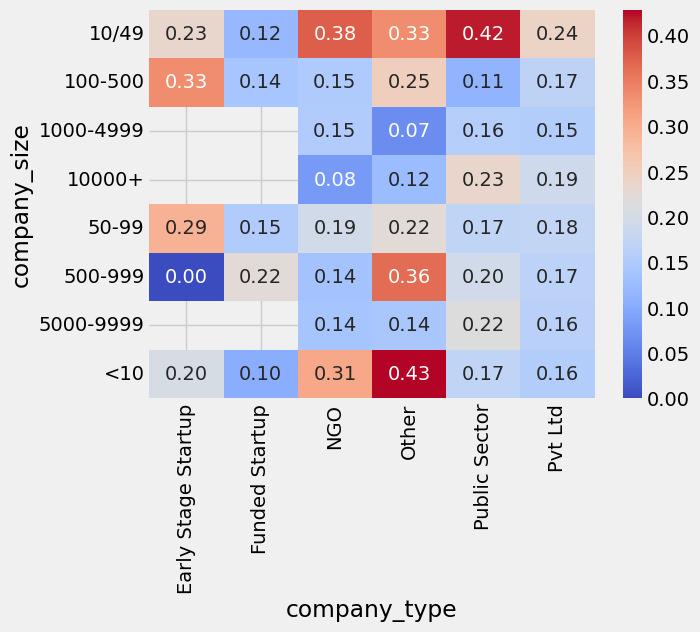

In [22]:
ct = pd.crosstab(ori_train["company_size"], ori_train["company_type"], values=ori_train["target"], aggfunc="mean")
sns.heatmap(ct, annot=True, cmap="coolwarm", fmt=".2f")


- unknown (회사 규모 미상)
> Early Stage Startup에서 이직률 67%   
> Other, Public Sector도 40% 이상  
> 회사 정보가 불명확한 경우 이직률이 높음

- 소규모 회사 (<10, 10/49, 50-99)
> Other, NGO 같은 회사에서 이직률 ↑  
> Pvt Ltd 같은 기은 이직률이 상대적으로 낮음

- 중대형 회사 (1000+ 이상)
> 전반적으로 target 비율이 낮음  
> 대기업은 안정적인 패턴 → 이직 위험 낮음

<Axes: xlabel='education_level', ylabel='training_hours'>

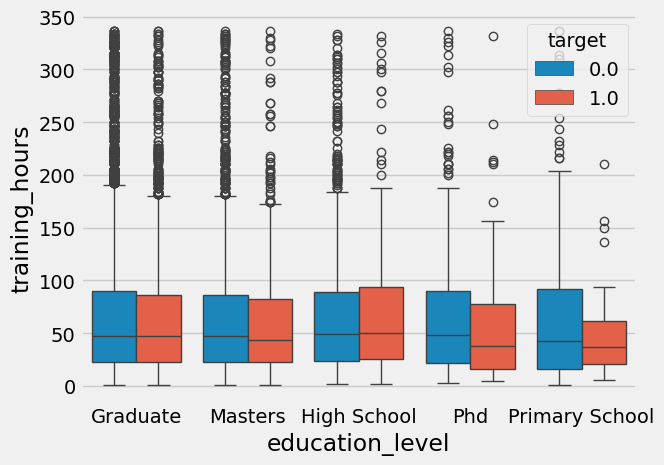

In [23]:
sns.boxplot(data=ori_train, x="education_level", y="training_hours", hue="target")


In [24]:
ori_train.groupby("education_level")["target"].mean()
ori_train.groupby(pd.cut(ori_train["training_hours"], bins=[0,20,50,100,200,400]))["target"].mean()
ori_train.groupby(["education_level", pd.cut(ori_train["training_hours"], bins=[0,20,50,100,200,400])])["target"].mean()


education_level  training_hours
Graduate         (0, 20]           0.286174
                 (20, 50]          0.285986
                 (50, 100]         0.279647
                 (100, 200]        0.272047
                 (200, 400]        0.231855
High School      (0, 20]           0.169620
                 (20, 50]          0.209953
                 (50, 100]         0.186380
                 (100, 200]        0.219941
                 (200, 400]        0.162500
Masters          (0, 20]           0.217617
                 (20, 50]          0.225667
                 (50, 100]         0.206633
                 (100, 200]        0.214815
                 (200, 400]        0.151899
Phd              (0, 20]           0.183673
                 (20, 50]          0.152000
                 (50, 100]         0.076923
                 (100, 200]        0.135593
                 (200, 400]        0.178571
Primary School   (0, 20]           0.109890
                 (20, 50]          0.188889


- Graduate (학사)
> 전체적으로 이직률이 제일 높음 (0.27~0.28)  
> 교육시간이 늘어나도 큰 변화는 없음 → 학사 출신 자체가 이직 의향이 높은 그룹  

- High School (고졸)
> 교육시간이 20~200 사이일 때 오히려 target 비율이 조금 더 높아짐

- Masters (석사)
> 200~400시간 구간에서 이직률이 크게 떨어짐  
> 석사 출신 중 장기 교육받은 그룹은 이직 의향 낮음.

- PhD (박사)
> 전반적으로 낮음  

- Primary School (초등학교)
> 100시간 이상 교육을 받은 경우 이직률이 낮음  
> 학력 낮아도 교육을 많이 받으면 이직보다는 “현재 자리에 머물 가능성”이 큼

<Axes: xlabel='city_development_index', ylabel='training_hours'>

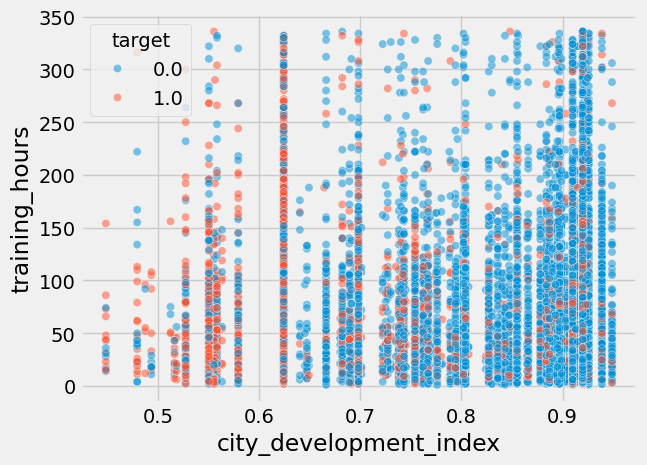

In [25]:
sns.scatterplot(data=ori_train, x="city_development_index", y="training_hours", hue="target", alpha=0.5)


In [26]:
ori_train["edu_major"] = ori_train["education_level"] + "_" + ori_train["major_discipline"].fillna("unknown")
ori_train.groupby("edu_major")["target"].mean().sort_values(ascending=False).head(10)


edu_major
Masters_unknown             0.500000
Masters_Arts                0.333333
Phd_Arts                    0.333333
Graduate_unknown            0.318182
Graduate_Other              0.305147
Graduate_STEM               0.283678
Graduate_Business Degree    0.268908
Graduate_No Major           0.257732
Masters_Business Degree     0.255814
Graduate_Humanities         0.230952
Name: target, dtype: float64

# 처리해야 할 것

⭐ drop 할거
- city 컬럼 : 고유값이 너무 많아서 그냥 drop, city_development_index가 이미 도시 발전 수준을 수치화해주고 있으니까...

⭐ 결측치 어떻게 처리할지
- gender: "unknown"카테고리 추가하기
- enrolled_univercity: "unknown"카테고리 추가하기
- education_level: 최빈값으로 채우기
- major_discipline: "unknown"카테고리 추가하기
- experience: 최빈값으로 채우기
- company_size: "unknown"카테고리 추가하기
- company_type: "unknown"카테고리 추가하기
- last_new_job: 최빈값으로 채우기

⭐증강

⭐ 연관분석
